모델 훈련

# 선형 회귀

간단한 선형 회귀 모델

$$삶의 만족도 = \theta_0 + \theta_1 \times 1인당 GDP$$

- 여기서 theta0, theta1은 모델 파라미터임
- 입력 특성의 가중치 합과 편향(bias) 더해 예측함

$$\hat{y} = \theta_0+\theta_1x_1+\theta_2x_2+\cdots+\theta_nx_n$$

- y^은 예측값
- n은 특성의 수
- x_i는 i번째 특성값
- theta_j는 j번째 모델 파라미터임

더 간단히 쓸 수 있음

$$\hat{y}=h_\theta(x)=\theta\cdot x$$

- theta는 편향 theta0과 theta1에서 thetan까지의 특성 가중치를 담은 모델의 파라미터 벡터임
- x는 x0에서 xn까지 담은 샘플의 특성 벡터임. x0는 항상 1임
- theta x는 벡터 theta와 x의 점곱임
- h_theta는 모델 파라미터 theta를 사용한 가설 함수임

성능지표가 필요
- 가장 널리 사용되는 성능 측정 지표 : 평균 제곱근 오차 (RMSE)
- RMSE를 최소화하는 theta를 찾아야함

- 선형 회귀 모델의 MSE 비용 함수

$$MSE(X, h_\theta) = \frac{1}{m}\sum_{i=1}^{m}(\theta^Tx^{(i)}-y^{i})^2$$

## 정규방정식

- 비용 함수를 최소화하는 theta값을 찾기 위한 **해석적인 방법**이 존재함
    - 결과를 바로 얻을 수 있는 수학 공식을 **정규방정식**이라고 함

$$\hat{\theta}=(X^TX)^{-1}X^Ty$$

- theta^은 비용 함수를 최소화하는 theta값임
- y는 y^(1)부터 y(m)까지를 포함하는 타깃 벡터임

In [1]:
import numpy as np
X = 2*np.random.rand(100, 1)
y = 4 + 3 * X + np.random.randn(100, 1)

In [2]:
y.shape

(100, 1)

In [3]:
X.shape

(100, 1)

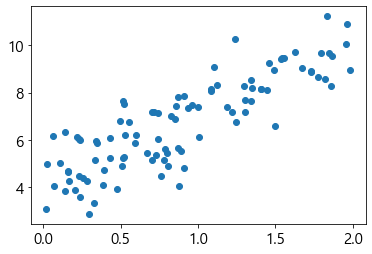

In [19]:
import matplotlib.pyplot as plt
import matplotlib
matplotlib.rcParams['font.family'] = 'Malgun Gothic' # Windows
matplotlib.rcParams['font.size'] = 15 # 글자 크기
matplotlib.rcParams['axes.unicode_minus'] = False # 한글 폰트 사용시, 마이너스 글자가 깨지는 현상을 해결

plt.scatter(X,y)
plt.show()

- 정규방정식을 사용해 theta를 계산하는 방법

In [8]:
X_b = np.c_[np.ones((100,1)), X] # 모든 샘플에 x0 = 1 을 추가함
theta_best = np.linalg.inv(X_b.T.dot(X_b)).dot(X_b.T).dot(y)

In [11]:
X_b

array([[1.        , 1.86473413],
       [1.        , 0.60119706],
       [1.        , 1.9596235 ],
       [1.        , 1.23785492],
       [1.        , 1.85896025],
       [1.        , 0.13761542],
       [1.        , 1.55800921],
       [1.        , 0.21883782],
       [1.        , 1.77844025],
       [1.        , 1.08370753],
       [1.        , 0.52132112],
       [1.        , 0.80333592],
       [1.        , 1.22123651],
       [1.        , 1.62721258],
       [1.        , 0.38442413],
       [1.        , 0.16357096],
       [1.        , 1.4072854 ],
       [1.        , 1.53928875],
       [1.        , 1.45674452],
       [1.        , 0.76142873],
       [1.        , 0.85189972],
       [1.        , 0.74165909],
       [1.        , 1.30203092],
       [1.        , 0.2588015 ],
       [1.        , 0.78657613],
       [1.        , 0.5207041 ],
       [1.        , 0.23942718],
       [1.        , 0.7049942 ],
       [1.        , 1.73330239],
       [1.        , 0.43001204],
       [1.

- 이 데이터를 생성하기 위해 사용한 함수는 y = 4 + 3x1 + 가우시안_잡음 임

In [9]:
theta_best

array([[4.11925076],
       [2.93481027]])

- theta0 = 4,215와 theta1 = 2,770 대신 theta0 = 4와 theta1 = 3을 기대했었으나 정확하게 재현하지 못함

---
- theta^을 사용해 예측해보겠음

In [10]:
X_new = np.array([[0], [2]])
X_new_b = np.c_[np.ones((2,1)), X_new] # 모든 샘플에 x0 = 1을 추가함
y_predict = X_new_b.dot(theta_best)
y_predict

array([[4.11925076],
       [9.9888713 ]])

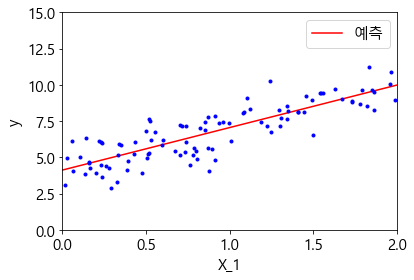

In [23]:
plt.plot(X_new, y_predict, "r-", label = "예측")
plt.plot(X, y, "b.")
plt.axis([0, 2, 0, 15])
plt.xlabel('X_1')
plt.ylabel('y')
plt.legend()
plt.show()

In [24]:
from sklearn.linear_model import LinearRegression
lin_reg = LinearRegression()
lin_reg.fit(X, y)

LinearRegression()

In [25]:
lin_reg.intercept_, lin_reg.coef_

(array([4.11925076]), array([[2.93481027]]))

In [26]:
lin_reg.predict(X_new)

array([[4.11925076],
       [9.9888713 ]])

- scipy.linalg.lstsq(0 함수를 기반으로 하기 때문에 이 함수를 직접 호출할 수 있음

In [27]:
theta_best_svd, residuals, rank, s = np.linalg.lstsq(X_b, y, rcond=1e-6)
theta_best_svd

array([[4.11925076],
       [2.93481027]])

- 이 함수는 theta^ = X^+ y 를 계산함
    - 여기서 X^+는 **유사역행렬** 임
        - np.linalg.pinv()로 유사역행렬을 직접 구할 수 있음

In [28]:
np.linalg.pinv(X_b).dot(y)

array([[4.11925076],
       [2.93481027]])

- 유사역행렬 자체는 **특잇값 분해 (SVD)** 라 부르는 표준 행렬 분해 기법을 사용해 계산됨
- SVD는 훈련 세트 행렬 X를 3개의 행렬 곱셉 
$U\sum U^T$
로 분해함

- 유사역행렬은 
$X^+=V\sum + U^T$
로 계산됨

1. $\sum +$를 계산하기 위해 $\sum$을 먼저 구하고 어떤 낮은 임곗값보다 작은 모든 수를 0으로 바꿈
2. 그 다음 0이 아닌 모든 값을 역수로 치환함
3. 만들어진 행렬을 전치함

**정규방정식을 계산하는 것보다 이 방식이 훨씬 효율적임**

- 극단적인 경우도 처리할 수 있음
- m < n이거나 어떤 특성이 중복되어 행렬 $X^TX$의 역행렬이 없다면 정규방정식이 작동하지 않음
- 하지만 유사역행렬은 항상 구할 수 있음

## 계산 복잡도

- 정규방정식은 $(n+1) \times (n+1)$ 크기가 되는 $X^TX$의 역행렬을 계산함
- 역행렬을 계산하는 **계산 복잡도**는 일반적으로 $O(n^{2.4})$에서 $O(n^3)$ 사이임
    - 즉 특성 수가 두 배로 늘어나면 계산 시간이 대략 5.3에서 8배로 증가

- 사이킷런의 LinearRegression 클래스가 사용하는 SVD 방법은 약 $O(n^2)$임

# 경사 하강법

**경사 하강법 gradient descent (GD)** 은 여러 종류의 문제에서 최적의 해법을 찾을 수 있는 일반적인 최적화 알고리즘임
- 경사 하강법의 기본 아이디어는 비용 함수를 최소화하기 위해 반복해서 파라미터를 조정해가는 것임
- 파라미터 벡터 theta에 대해 비용 함수의 현재 그레이디언트를 계산하고 감소하는 방향으로 진행함
    - 그레이디언트가 0이 되면 최솟값에 도달한 것임
- theta를 임의의 값으로 시작해서( **무작위 초기화** ) 한 번에 조금씩 비용 함수가 감소되는 방향으로 진행하여 알고리즘이 최솟값에 수렴할 때까지 점진적으로 향상시킴

- 경사 하강법에서 중요한 파라미터는 스텝의 크기로 **학습률** 하이퍼파라미터로 결정됨
    - 학습률이 너무 작으면 수렴하기 위해 반복을 많이 진행해야 하므로 시간이 오래 걸림
    - 학습률이 너무 크면 발산하게 되어 적절한 해법을 찾지 못함

경사하강법의 문제
- 무작위 초기화로 인해 **전역 최솟값 global minimum** 보다 **지역 최솟값 local minimum**에 수렴함

- 선형 회귀를 위한 MSE 비용 함수는 두 점을 선택해 선을 그어도 곡선을 가로지르지 않는 **볼록 함수 convex function**임
    - 지역 최솟값은 없다는 뜻
---
- 특성들의 스케일이 매우 다르면 길쭉한 모양이 됨
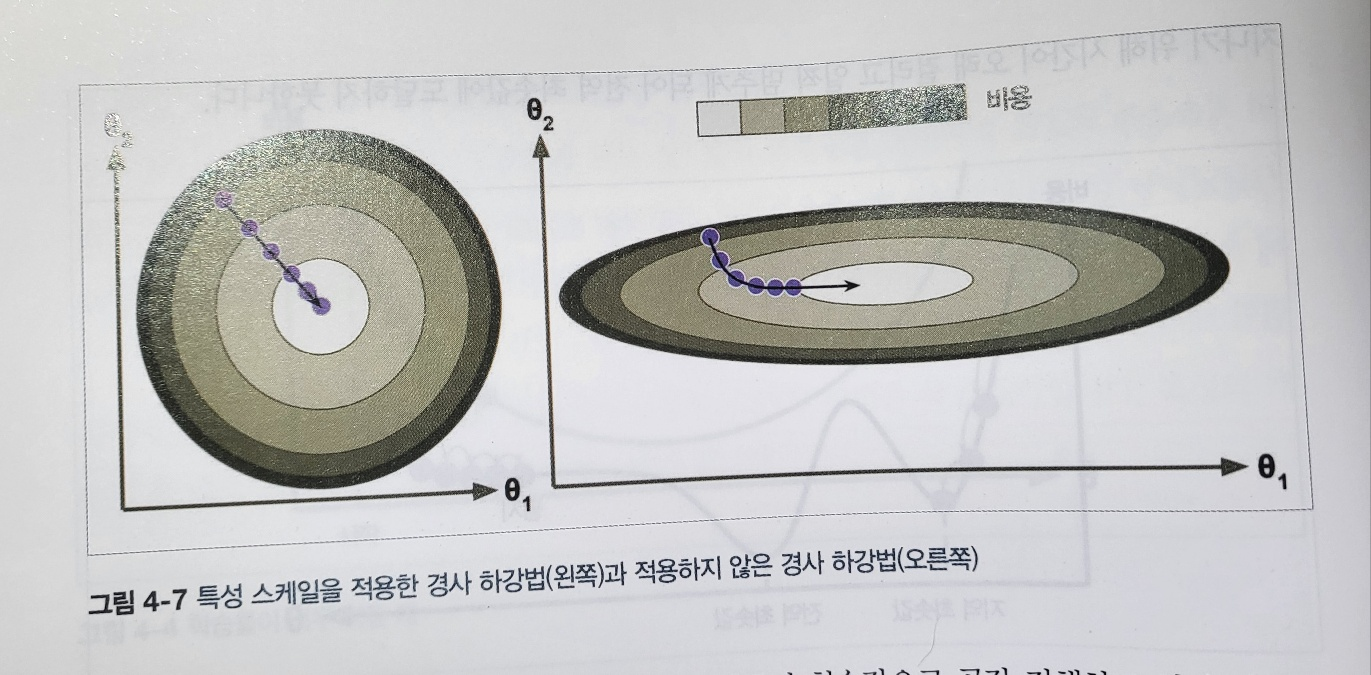
- 왼쪽은 빠르게 도달하겠지만 오른쪽은 길게 돌아서 가기 때문에 오래걸림

- 모델 훈련이 비용 함수를 최소화하는 모델 파라미터의 조합을 찾는 일임을 설명함
- 모델의 **파라미터 공간**에서 찾는다고 말함
- 모델이 가진 파라미터가 많을수록 이 공간의 차원은 커지고 검색이 더 어려워짐

## 배치 경사 하강법

경사 하강법을 구현하려면 각 모델 파라미터 theta_j에 대해 비용 함수의 그레이디언트를 계산해야함
- 즉, theta_j가 조금 변경될 때 비용 함수가 얼마나 바뀌는지 계산해야함
- 이를 **편도함수 partial derivative**라고 함

$$\frac{\partial}{\partial\theta_j}MSE(\theta) = \frac{2}{m}\sum_{i=1}^{m}(\theta^Tx^{(i)}-y^{(i)})x^{(i)}_j$$

- 한꺼번에 계산하여 비용 함수의 편도함수를 담는 비용 함수의 그레이디언트 벡터는 다음과 같음

$$\nabla_\theta MSE(\theta) = \begin{pmatrix}\frac{\partial}{\partial\theta_0}MSE(\theta)\\\frac{\partial}{\partial\theta_1}MSE(\theta)\\\frac{\partial}{\partial\theta_2}MSE(\theta)\\\cdots\\\frac{\partial}{\partial\theta_n}MSE(\theta) \\\end{pmatrix} = \frac{2}{m}X^T(X\theta-y)$$



- 위 공식은 매 경사 하강법 스텝에서 전체 훈련 세트 X에 대해 계산함
    - **배치 경사 하강법**이라고도 함
    - 매 스텝에서 훈련 데이터 전체를 사용함
        - 매우 큰 훈련 세트에서는 매우 느림
        - 하지만 특성 수에 민감하지 않음
            - 수십만 개의 특성에서 선형 회귀를 훈련시키려면 정규방정식이나 SVD 분해보다 경사 하강법이 더 좋음

- 위로 향하는 그레이디언트 벡터가 구해지면 반대 방향인 아래로 가야함
    - 즉 $\theta$에서 $\nabla_\theta MSE(\theta)$를 빼야 한다는 뜻임
    - 여기서 학습률 $\eta$가 사용됨
    - 내려가는 스텝의 크기를 결정하기 위해 그레이디언트 벡터에 $\eta$를 곱함

$$\theta^{(next step)} = \theta - \eta \nabla_\theta MSE(\theta)$$

In [29]:
eta = 0.1 # 학습률
n_iterations = 1000
m = 100

theta = np.random.randn(2, 1) # 무작위 초기화

for iteration in range(n_iterations):
    gradients = 2/m*X_b.T.dot(X_b.dot(theta) - y)
    theta = theta - eta * gradients

In [30]:
theta

array([[4.11925076],
       [2.93481027]])

- 정규방정식으로 찾은 것과 정확히 같음
- 학습률을 완전히 바꿔보면 어떻게 될까?

In [31]:
theta_path_bgd = []

def plot_gradient_descent(theta, eta, theta_path=None):
    m = len(X_b)
    plt.plot(X, y, "b.")
    n_iterations = 1000
    for iteration in range(n_iterations):
        if iteration < 10:
            y_predict = X_new_b.dot(theta)
            style = "b-" if iteration > 0 else "r--"
            plt.plot(X_new, y_predict, style)
        gradients = 2/m * X_b.T.dot(X_b.dot(theta) - y)
        theta = theta - eta * gradients
        if theta_path is not None:
            theta_path.append(theta)
    plt.xlabel("$x_1$", fontsize=18)
    plt.axis([0, 2, 0, 15])
    plt.title(r"$\eta = {}$".format(eta), fontsize=16)

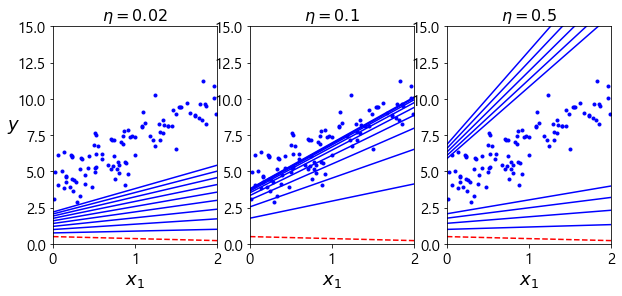

In [37]:

np.random.seed(42)
theta = np.random.randn(2,1)  # random initialization

plt.figure(figsize=(10,4))
plt.subplot(131); plot_gradient_descent(theta, eta=0.02)
plt.ylabel("$y$", rotation=0, fontsize=18)
plt.subplot(132); plot_gradient_descent(theta, eta=0.1, theta_path=theta_path_bgd)
plt.subplot(133); plot_gradient_descent(theta, eta=0.5)

plt.show()

- 왼쪽은 학습률이 너무 낮음
- 시간이 오래 걸릴 것임
- 가운데는 학습률이 아주 적당해 보임
- 오른쪽은 학습률이 매우 커보임
---
- 적절한 학습률을 찾기 위해 그리드 탐색 사용
- 반복 횟수를 아주 크게 지정하고 그레이디언트 벡터가 아주 작아지면, 즉 벡터의 노름이 어떤 값 (**허용오차 tolerance**)보다 작아지면 경사 하강법이 최솟값에 도달한 것이므로 알고리즘을 중지함

## 확률적 경사 하강법

배치 경사 하강법의 가장 큰 문제는 매 스텝에서 전체 훈련 세트를 사용해 그레이디언트를 계산한다는 것

즉 훈련 세트가 커지면 매우 느려짐

이와 정 반대로 **확률적 경사 하강법**은 매 스텝에서 한 개의 샘플을 무작위로 선택하고 그 하나의 샘플에 대한 그레이디언트를 계산함

- 훨씬 빨라짐
- 매 반복에서 하나의 샘플만 메모리에 있으면 되므로 매우 큰 훈련 세트도 훈련시킬 수 있음

--- 
하지만 배치 경사 하강법보다 훨씬 불안정함

- 비용 함수가 최솟값에 다다를 때까지 부드럽게 감소하지 않고 위아래로 요동치며 평균적으로 감소함
- 시간이 지나면 최솟값에 매우 근접하겠지만 요동이 지속되면서 최솟값에 안착하지 못할 것임
- 알고리즘이 멈출 때 좋은 파라미터가 구해지겠지만 최적치는 아님
---
- 비용 함수가 매우 불규칙할 때 지역 최솟값을 건너뛰도록 도와주므로 전역 최솟값을 찾을 가능성이 높음
- 하지만 전역 최솟값에는 다다르지 못한다는 점이 단점임
---
- 이 딜레마를 해결할 방법은 **학습률을 점진적으로 감소시키는 것**임
- 시작할 때는 크게하고 점차 작게 줄여서 알고리즘이 전역 최솟값에 도달하게끔 만듦
- 이 과정이 금속공학 분야에서 가열한 금속을 천천히 냉각시키는 어닐링 annealing (풀림) 과정에서 영감을 얻은 **달금질 기법 simulated annealing** 알고리즘과 유사함
- 매 반복에서 학습률을 결정하는 함수를 **학습 스케줄**이라고 부름
- 학습률이 너무 빨리 줄어들면 지역 최솟값에 갇히거나 최솟값까지 가는 중간에 멈춰버릴 수 있음
- 학습률을 너무 천천히 줄어들면 최솟값 주변을 맴돌거나 너무 일찍 중지해서 지역 최솟값에 머무를 수 있음

In [40]:
n_epochs = 50
t0, t1 = 5, 50 # 학습 스케줄 하이퍼파라미터

def learning_schedule(t):
    return t0 / (t + t1)

theta = np.random.randn(2, 1) # 무작위 초기화

for epoch in range(n_epochs):
    for i in range(m):
        random_index = np.random.randint(m)
        xi = X_b[random_index:random_index+1]
        yi = y[random_index:random_index+1]
        gradients = 2 * xi.T.dot(xi.dot(theta) - yi)
        eta = learning_schedule(epoch * m + i)
        theta = theta - eta * gradients

In [41]:
theta

array([[4.12382459],
       [2.87953965]])

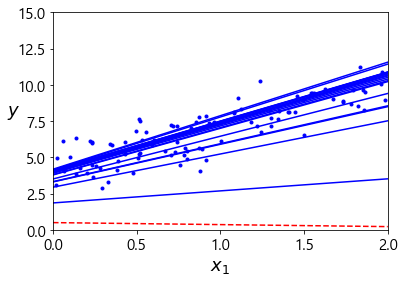

In [43]:
theta_path_sgd = []
m = len(X_b)
np.random.seed(42)
n_epochs = 50
t0, t1 = 5, 50  # learning schedule hyperparameters

def learning_schedule(t):
    return t0 / (t + t1)

theta = np.random.randn(2,1)  # random initialization

for epoch in range(n_epochs):
    for i in range(m):
        if epoch == 0 and i < 20:                    # not shown in the book
            y_predict = X_new_b.dot(theta)           # not shown
            style = "b-" if i > 0 else "r--"         # not shown
            plt.plot(X_new, y_predict, style)        # not shown
        random_index = np.random.randint(m)
        xi = X_b[random_index:random_index+1]
        yi = y[random_index:random_index+1]
        gradients = 2 * xi.T.dot(xi.dot(theta) - yi)
        eta = learning_schedule(epoch * m + i)
        theta = theta - eta * gradients
        theta_path_sgd.append(theta)                 # not shown

plt.plot(X, y, "b.")                                 # not shown
plt.xlabel("$x_1$", fontsize=18)                     # not shown
plt.ylabel("$y$", rotation=0, fontsize=18)           # not shown
plt.axis([0, 2, 0, 15])                              # not shown
plt.show()                                           # not shown

- 샘플을 무작위로 선택하기 때문에 어떤 샘플은 한 에포크에서 여러 번 선택될 수 있고 어떤 샘플은 전혀 선택되지 못할 수도 있음
- 알고리즘이 에포크마다 모든 샘플을 사용하게 하려면 훈련 세트를 섞은 후 차례대로 하나씩 선택하고 다음 에포크에서 다시 썩는 식의 방법을 사용할 수 있음
    - 하지만 이렇게 하면 더 늦게 수렴함

- 사이킷런에서 SGD 방식으로 선형 회귀를 사용하려면 기본값으로 제곱 오차 비용 함수를 최적화하는 SGDRegressor 클래스를 사용함

In [45]:
from sklearn.linear_model import SGDRegressor
# max_iter 에포크
# 0.001보다 적게 손실이 줄어들 때까지 실행함 (tol=1e-3)
# 학습률 0.1로 기본 학습 스케줄을 사용함
# 규제 없음 (penalty=None)
sgd_reg = SGDRegressor(max_iter=1000, tol=1e-3, penalty=None, eta0=0.1)
sgd_reg.fit(X, y.ravel())

SGDRegressor(eta0=0.1, penalty=None)

In [46]:
sgd_reg.intercept_, sgd_reg.coef_

(array([4.1464299]), array([2.95584383]))

- 정규방정식으로 구한 것과 매우 비슷한 값을 얻었음

## 미니배치 경사 하강법

**미니배치 경사 하강법** : 각 스텝에서 전체 훈련 세트나 하나의 샘플을 기반으로 그레이디언트를 계산하는 것이 아니라 **미니배치**라 부르는 임의의 작은 샘플 세트에 대해 그레이디언트를 계산함

- 주요 장점은 행렬 연산에 최적화된 하드웨어, 특히 GPU를 사용해서 얻는 성능 향상임
- 미니배치를 어느 정도 크게 하면 이 알고리즘은 파라미터 공간에서 SGD보다 덜 불규칙하게 움직임
- 하지만 지역 최솟값에서 빠져나오기가 더 힘들수도 있음

In [47]:
theta_path_mgd = []

n_iterations = 50
minibatch_size = 20

np.random.seed(42)
theta = np.random.randn(2,1)  # random initialization

t0, t1 = 200, 1000
def learning_schedule(t):
    return t0 / (t + t1)

t = 0
for epoch in range(n_iterations):
    shuffled_indices = np.random.permutation(m)
    X_b_shuffled = X_b[shuffled_indices]
    y_shuffled = y[shuffled_indices]
    for i in range(0, m, minibatch_size):
        t += 1
        xi = X_b_shuffled[i:i+minibatch_size]
        yi = y_shuffled[i:i+minibatch_size]
        gradients = 2/minibatch_size * xi.T.dot(xi.dot(theta) - yi)
        eta = learning_schedule(t)
        theta = theta - eta * gradients
        theta_path_mgd.append(theta)

In [48]:
theta_path_bgd = np.array(theta_path_bgd)
theta_path_sgd = np.array(theta_path_sgd)
theta_path_mgd = np.array(theta_path_mgd)

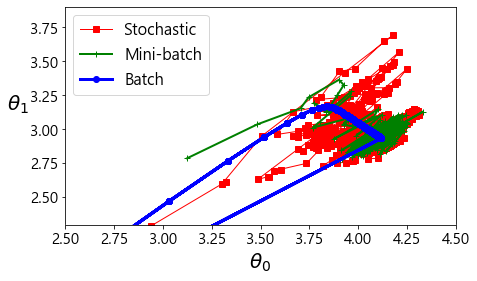

In [50]:
plt.figure(figsize=(7,4))
plt.plot(theta_path_sgd[:, 0], theta_path_sgd[:, 1], "r-s", linewidth=1, label="Stochastic")
plt.plot(theta_path_mgd[:, 0], theta_path_mgd[:, 1], "g-+", linewidth=2, label="Mini-batch")
plt.plot(theta_path_bgd[:, 0], theta_path_bgd[:, 1], "b-o", linewidth=3, label="Batch")
plt.legend(loc="upper left", fontsize=16)
plt.xlabel(r"$\theta_0$", fontsize=20)
plt.ylabel(r"$\theta_1$   ", fontsize=20, rotation=0)
plt.axis([2.5, 4.5, 2.3, 3.9])
plt.show()

- 파라미터 공간에서 움직인 경로임
- 모두 최솟값 근처에 도달했지만 배치 경사 하강법의 경로가 실제로 최솟값에 멈춘 반면 , 나머지는 맴돌고 있음
---
- 배치 경사 하강법은 매 스텝에서 많은 시간이 소요되고 확률적 경사 하강법과 미니배치 경사 하강법도 적절한 학습 스케줄을 사용하면 최솟값에 도달할 수 있음

논의한 알고리즘으로 선형 회귀를 사용해 비교해보겠음

<font color="red">정리</font>

|알고리즘|m이 클 때|외부 메모리 학습 지원|n이 클 때|하이퍼 파라미터 수|스케일 조정 필요|사이킷런|
|:---|:---|:---|:---|:---|:---|:---|
|정규방정식|빠름|No|느림|0|No|N/A|
|SVD|빠름|No|느림|0|No|LinearRegression|
|배치 경사 하강법|느림|No|빠름|2|Yes|SGDRegressor|
|확률적 경사 하강법|빠름|Yes|빠름|$\geq$ 2|Yes|SGDRegressor|
|미니배치 경사 하강법|빠름|Yes|빠름|$\geq$ 2|Yes|SGDRegressor|